In [1]:
import sys
sys.path.insert(1, '/bask/homes/f/fedu7800/vjgo8416-demoland/spatial_signatures/eo/ai_pipeline')

import pandas as pd
import pipeline
from pipeline import GeoTileDataset, read_data, plot_examples

from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import geopandas as gpd

%matplotlib inline

In [2]:
geojson_path = '/bask/homes/f/fedu7800/vjgo8416-demoland/spatial_signatures/eo/data/example/london_25_25_grid_clipped.geojson'
#geojson_path = '/bask/homes/f/fedu7800/vjgo8416-demoland/spatial_signatures/eo/data/example/liverpool_25_25_grid_clipped.geojson'

vrt_file = '/bask/homes/f/fedu7800/vjgo8416-demoland/satellite_demoland/data/mosaic_cube/vrt_allbands/2017_combined.vrt'

In [3]:
#The function read_data(geojson_path, vrt_file) initialises a custom geospatial dataset and prepares a dataloader for batch processing.
dataset, dataloader = read_data(geojson_path, vrt_file)

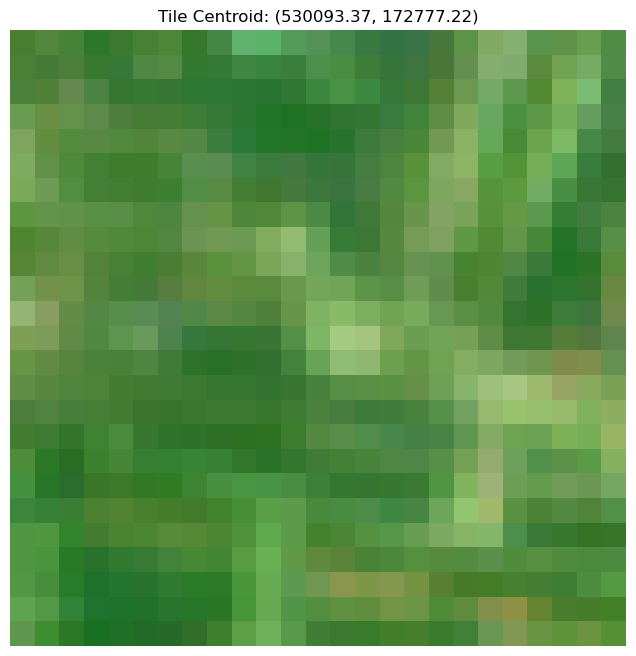

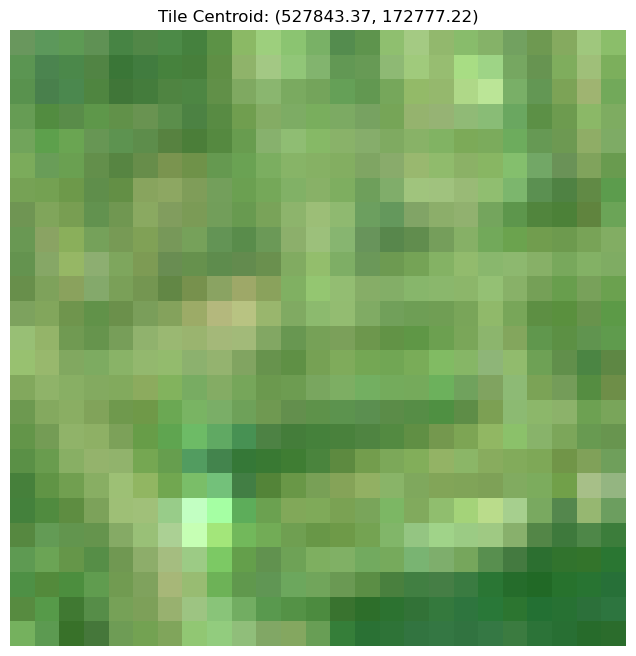

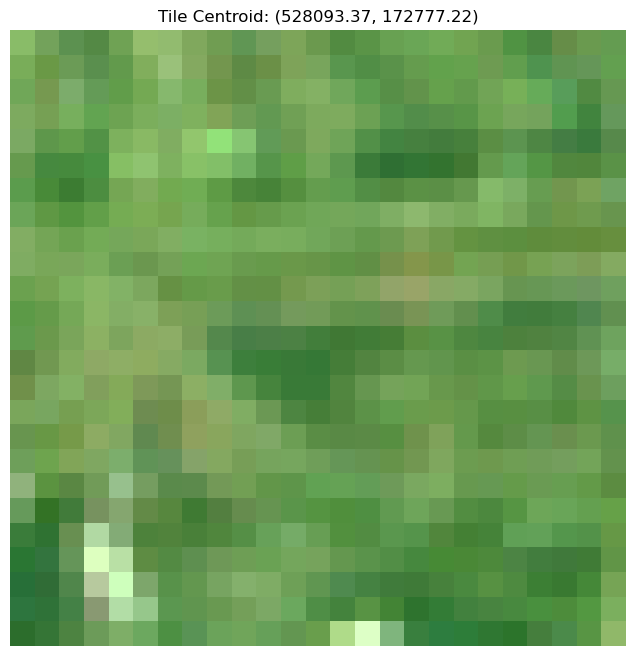

In [4]:
#The function plot_examples(dataset, num_examples=n) is used to visualise example image tiles from the dataset. 
#This helps in verifying the quality and preprocessing of the satellite imagery before using it in a model.
plot_examples(dataset, num_examples=3)

In [5]:
# Run the pipeline
pipeline.spatial_sig_prediction(
    geo_path= "/bask/homes/f/fedu7800/vjgo8416-demoland/spatial_signatures/eo/data/example/london_25_25_grid_clipped.geojson",
    vrt_file= "/bask/homes/f/fedu7800/vjgo8416-demoland/satellite_demoland/data/mosaic_cube/vrt_allbands/2017_combined.vrt",
    xgb_weights = "/bask/homes/f/fedu7800/vjgo8416-demoland/spatial_signatures/eo/data/weights/xgb_model_25_latlonh6_feb25_weighted.bin",
    model_weights = "/bask/homes/f/fedu7800/vjgo8416-demoland/satellite_demoland/models/satlas/weights/satlas-model-v1-lowres.pth",
    output_path= "/bask/homes/f/fedu7800/vjgo8416-demoland/spatial_signatures/eo/data/predictions/test_london_h6.parquet",
    h3_resolution=6
)

In [6]:
test = gpd.read_parquet('/bask/homes/f/fedu7800/vjgo8416-demoland/spatial_signatures/eo/data/predictions/test_london_h6.parquet')

In [7]:
class_labels = {
    'Accessible suburbia': 0,
    'Connected residential neighbourhoods': 1,
    'Countryside agriculture': 2,
    'Dense residential neighbourhoods': 3,
    'Dense urban neighbourhoods': 4,
    'Disconnected suburbia': 5,
    'Gridded residential quarters': 6,
    'Open sprawl': 7,
    'Urban buffer': 8,
    'Urbanity': 9,
    'Warehouse/Park land': 10,
    'Wild countryside': 11
}

In [8]:
test['class'] = test['prediction'].map({v: k for k, v in class_labels.items()})

In [9]:
test.explore(column='class', cmap='Accent')

In [10]:
# Run the pipeline
pipeline.spatial_sig_prediction(
    geo_path= "/bask/homes/f/fedu7800/vjgo8416-demoland/spatial_signatures/eo/data/example/liverpool_25_25_grid_clipped.geojson",
    vrt_file= "/bask/homes/f/fedu7800/vjgo8416-demoland/satellite_demoland/data/mosaic_cube/vrt_allbands/2017_combined.vrt",
    xgb_weights = "/bask/homes/f/fedu7800/vjgo8416-demoland/spatial_signatures/eo/data/weights/xgb_model_25_latlonh7_feb25_weighted.bin",
    model_weights = "/bask/homes/f/fedu7800/vjgo8416-demoland/satellite_demoland/models/satlas/weights/satlas-model-v1-lowres.pth",
    output_path= "/bask/homes/f/fedu7800/vjgo8416-demoland/spatial_signatures/eo/data/predictions/test_liverpool_h7.parquet",
    h3_resolution=7
)

In [11]:
test2 = gpd.read_parquet('/bask/homes/f/fedu7800/vjgo8416-demoland/spatial_signatures/eo/data/predictions/test_liverpool_h7.parquet')

In [12]:
test2['class'] = test2['prediction'].map({v: k for k, v in class_labels.items()})

In [14]:
test2.explore(column='class', cmap='tab20')